In [1]:
import geopandas as gpd

gdf = gpd.read_file('plano2028-(nao-commitar)/PlanoCicloviario-2028.shp')
#gdf = gpd.read_file('conexoes2019/Conexїes-2019-2020.shp')
gdf.crs = '+init=epsg:29193' # PlanoCicloviario-2028.shp proj (SAD69 / UTM zone 23S)
proj="+init=epsg:4326" # lat/lon proj
gdf = gdf.to_crs(proj) # convertion

In [2]:
gdf.head()

tipo titulo preposicao                            nome         SUBP  \
0  None   None       None  VIA PROJETADA OUC ARCO JURUBAT  SANTO AMARO   
1    AV   NSRA         DE                          SABARA  SANTO AMARO   
2     R   None       None                      BORBA GATO  SANTO AMARO   
3     R   None       None                    CARLOS GOMES  SANTO AMARO   
4     R   None       None                  ISABEL SCHMIDT  SANTO AMARO   

   Extensão Ciclistas Programa_D  \
0       749      None       None   
1       902      None       None   
2       521      None       None   
3       302      None       None   
4       561      None       None   

                                            geometry  
0  LINESTRING (-135.23733 -85.52535, -135.23733 -...  
1  LINESTRING (-135.23733 -85.52535, -135.23733 -...  
2  LINESTRING (-135.23733 -85.52535, -135.23733 -...  
3  LINESTRING (-135.23733 -85.52535, -135.23733 -...  
4  MULTILINESTRING ((-135.23733 -85.52535, -135.2...

In [6]:
gdf.Programa_D.unique()

array([None, 'NAÇÕES UNIDAS', 'CECILIA LOTEMBERG', 'ALCEU MAYNARD ARAÚJO',
       'CORREDOR ABD', 'CARLOS CALDEIRA - I', 'MATIAS BECK',
       'TEOTONIO VILELA - I', 'REBOUÇAS',
       'TERRITÓRIO CEU - PQ NOVO MUNDO', 'AVENIDA SÃO MIGUEL',
       'LUIZ IGNACIO ANHAIA MELLO', 'LUIZ SERAPHICO JUNIOR',
       'MIGUEL YUNES', 'MARIA CANDIDA', 'EDUCADOR PAULO FREIRE',
       'AIRTON PRETINI', 'SALIM FARAH MALUF', 'JACU-PESSEGO',
       'LIGACAO LAPA-PIRITUBA', 'GASTAO VIDIGAL - PONTE REMÉDIOS',
       'AV MERCEDES', 'VD BRESSER', 'GABRIELA MISTRAL',
       'ENG CAETANO ALVARES', 'GUAICURUS', 'LGO DO SOCORRO',
       'FREIRE CISNEIRO', 'PARADA PINTO', 'SAMARITÁ - IAPÓ',
       'MIGUEL CONEJO - JOAO PAULO I', 'EDGAR FACO - TRECHO 2',
       'N. S. DO O  - BALSA 2', 'ITABERABA', 'MARIO MALDONADO',
       'DOMINGOS DE MORAIS', 'BENJAMIN PEREIRA', 'ANTONIO MARIA LAET',
       'PAULO DE FARIA', 'NICE', 'TUCURUVI', 'PRAÇA CAMPO DE BAGATELLE',
       'TIRADENTES', 'LUIZ DUMONT VILLARES', 'SÃO JOAO

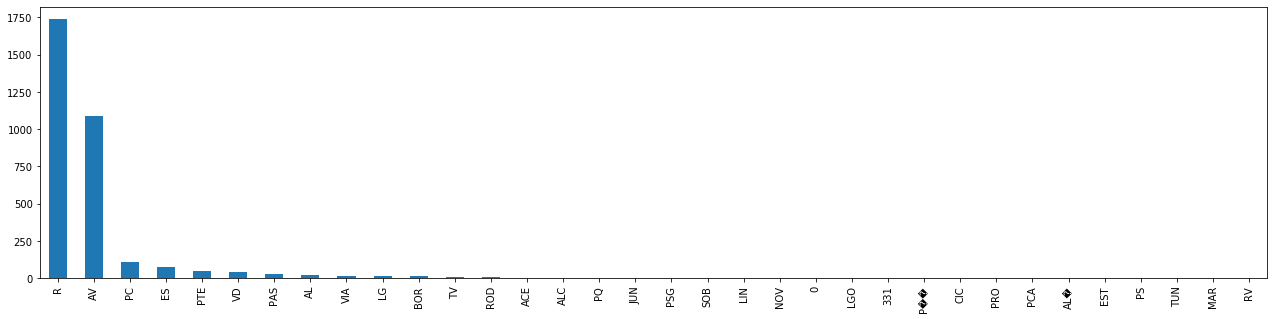

In [59]:
from pylab import rcParams
rcParams['figure.figsize'] = 22, 5

gdf['tipo'].value_counts().plot(kind='bar')
#gdf.hist(column = 'Extensão')

In [26]:
gdf_cic = gdf[gdf.tipo == 'CIC']
gdf_cic

tipo titulo preposicao                nome  SUBP  Extensão Ciclistas  \
538  CIC   None       None  MARGINAL PINHEIROS  None       189      None   

    Programa_D                                           geometry  
538       None  LINESTRING (-135.23732 -85.52535, -135.23732 -...

In [4]:
gdf_top5 = gdf[gdf['Ciclistas'] == 'INDICADA']
gdf_top5.shape

(107, 9)

In [5]:
gdf_top5.head()

tipo titulo preposicao               nome                     SUBP  \
1677   AV   None       None    NOVA CANTAREIRA          JACANA-TREMEMBE   
2192   AV   None       None    NOVA CANTAREIRA          JACANA-TREMEMBE   
2401    R   None       None           APENINOS                       SE   
2403    R   None       None              REIMS  CASA VERDE-CACHOEIRINHA   
2404   AV   None       None  ORDEM E PROGRESSO  CASA VERDE-CACHOEIRINHA   

      Extensão Ciclistas     Programa_D  \
1677       489  INDICADA           None   
2192       332  INDICADA           None   
2401        37  INDICADA  PIRES DA MOTA   
2403       164  INDICADA           None   
2404       329  INDICADA           None   

                                               geometry  
1677  LINESTRING (-135.23731 -85.52535, -135.23731 -...  
2192  LINESTRING (-135.23730 -85.52535, -135.23730 -...  
2401  LINESTRING (-135.23732 -85.52535, -135.23732 -...  
2403  LINESTRING (-135.23731 -85.52535, -135.23731 -...  
2404  LINESTRING (-135.23731 -85.52535, -135.23731 -...

In [ ]:
gdf_ciclofaixas = gdf[gdf['rc_descric'] == 'CICLOFAIXA']
pts_ciclofaixas_geosampa = gdf_ciclofaixas.geometry.unary_union
gdf_ciclovias = gdf[gdf['rc_descric'] == 'CICLOVIA']
pts_ciclovias_geosampa = gdf_ciclovias.geometry.unary_union